In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score

In [87]:
prosper_df = pd.read_csv('Update_Listings_cleaned_v1.csv', index_col='unique_identifier')

prosper_df.head()

,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,employment_status,...,lender_indicator,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating
unique_identifier,,,,,,,,,,,,,,,,,,,,,
0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,0,...,0,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B
1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,0,...,0,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A
2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,0,...,0,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B
3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,0,...,0,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A
4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,0,...,0,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA


In [88]:
X = prosper_df.drop(["lender_yield","borrower_apr","listing_monthly_payment","income_range_description","employment_status_description","occupation","borrower_state","borrower_city","TUFicoRange","CoBorrowerApplication","prosper_rating","rating_num","borrower_state_num", "group_indicator", "dti_wprosper_loan"], axis=1)

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\Saman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [91]:
prosper_df['kmeans_rating'] = clusters

In [92]:
prosper_df.head()

,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,employment_status,...,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating,kmeans_rating
unique_identifier,,,,,,,,,,,,,,,,,,,,,
0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,0,...,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B,0
1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,0,...,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A,0
2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,0,...,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B,1
3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,0,...,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A,1
4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,0,...,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA,0


In [93]:
actual_ratings = prosper_df['rating_num']
kmeans_ratings = prosper_df['kmeans_rating']

In [94]:
accuracy = accuracy_score(actual_ratings, kmeans_ratings)
print("Accuracy:", accuracy)

Accuracy: 0.45537065052950076


In [95]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [96]:
clusters_hierarachy = hierarchical_clustering.fit_predict(X)

In [97]:
prosper_df['hierarachy_rating'] = clusters_hierarachy

In [98]:
hierarachy_ratings = prosper_df['hierarachy_rating']

In [99]:
accuracy_h = accuracy_score(actual_ratings, hierarachy_ratings)
print("Accuracy:", accuracy_h)

Accuracy: 0.5128593040847201


In [113]:
kmeans_accuracies = []
for rating in range(3):
    actual_ratings = prosper_df[prosper_df['rating_num'] == rating]
    accuracy_kmeans = accuracy_score(actual_ratings['rating_num'],actual_ratings['kmeans_rating'])
    kmeans_accuracies.append(accuracy_kmeans)

In [114]:
h_accuracies = []
for rating_h in range(3):
    actual_ratings = prosper_df[prosper_df['rating_num'] == rating_h]
    accuracy_h = accuracy_score(actual_ratings['rating_num'],actual_ratings['hierarachy_rating'])
    h_accuracies.append(accuracy_h)
    

In [115]:
import matplotlib.pyplot as plt
import numpy as np

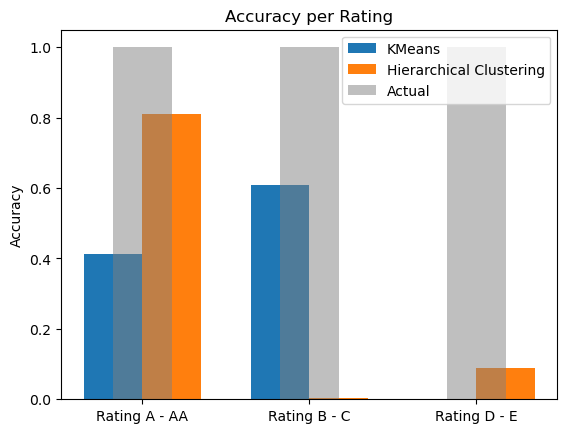

In [126]:
ratings = range(3)
bar_width = 0.35

labels = ['Rating A - AA', 'Rating B - C', 'Rating D - E']

fig, ax = plt.subplots()
bar1 = ax.bar([r - bar_width/2 for r in ratings], kmeans_accuracies, bar_width, label='KMeans')
bar2 = ax.bar([r + bar_width/2 for r in ratings], h_accuracies, bar_width, label='Hierarchical Clustering')
bar3 = ax.bar(ratings, [1.0]*3, bar_width, label='Actual', alpha=0.5, color='gray')

#ax.set_xlabel('Rating')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy per Rating')
ax.set_xticks(ratings)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('Visualizations\cluster_rating.png')

plt.show()